In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

In [40]:
df_cur = pd.read_excel("witn_new_rat_ag_num_cat_catnum.xlsx")
df_cur.head(5)

,Unnamed: 0,_id,success,_name,name_comp,_ro_type,identifier,identifier_type,additional_identifier_type,isin,...,id_uuid,json_additional,meta,new_rating,agency,rating_numeric,rating_numeric_int,rating_category,rating_category_,rating_numeric_cat
0,0,1,True,Общество с ограниченной ответственностью Холди...,NaN,BNFC - нефинансовая компания,7801293231,ИНН,NaN,NaN,...,a0f6e8c8-a2e7-4740-97ac-fff125c0821a,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB-,Expert RA,10,10,BBB,BBB,4
1,1,2,True,Общество с ограниченной ответственностью ПЕТЕР...,NaN,BNFC - нефинансовая компания,7801423924,ИНН,NaN,NaN,...,c317bce9-7d26-456a-be8c-6f2cda45042d,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruB+,Expert RA,14,14,B,B,6
2,2,3,True,Общество с ограниченной ответственностью ХРОМО...,NaN,BNFC - нефинансовая компания,5249111131,ИНН,NaN,NaN,...,9643b9cf-295f-4fc9-82d4-30f3b791101f,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBB,Expert RA,12,12,BB,BB,5
3,3,5,True,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КИНГ...",NaN,BNFC - нефинансовая компания,7816562511,ИНН,NaN,NaN,...,537699a6-7c72-46a4-b2bd-b12b7157fe3e,NaN,"{'Comment': 'Success', 'added key to': 'level_...",BBB-(RU),AKRA,10,10,BBB,BBB,4
4,4,1634,True,"Облигации, АО «АЛЬФА-БАНК», Старший необеспече...",АКЦИОНЕРНОЕ ОБЩЕСТВО «АЛЬФА-БАНК»,TBND - облигационный займ,7728168971,ИНН,NaN,RU000A107A69,...,d87bb094-ca4b-42f5-967a-be180b943d96,NaN,"{'Comment': 'Success', 'added key to': 'level_...",AA+(RU),AKRA,2,2,AA,AA,2


In [41]:
df_cur = df_cur.loc[~df_cur["_ro_type"].str.startswith("T", na=False)]
ident = df_cur["identifier"].unique()
series_length = {}
for inn in ident:
    if inn not in series_length:
        series_length[inn] = {}
    for agency in df_cur["agency"].unique():
        if agency not in series_length[inn]:
            series_length[inn][agency] = []
        temp_df = df_cur[(df_cur["identifier"] == inn) & (df_cur["agency"] == agency)]
        curr_len = len(temp_df["new_rating"])
        series_length[inn][agency] = curr_len   # there should apply the length of series of each company in cra
df_ser = pd.DataFrame().from_dict(series_length).T.reset_index()
df_ser.rename(columns={"index": "identifier"}, inplace=True)

In [42]:
df_ser

,identifier,Expert RA,AKRA,NCR,NRA
0,7801293231,1,0,0,0
1,7801423924,1,0,0,0
2,5249111131,1,0,0,0
3,7816562511,0,1,0,0
4,5406192366,0,4,0,0
...,...,...,...,...,...
1301,7701899124,1,0,0,0
1302,7707285385,1,0,0,0
1303,7727039934,1,0,0,0
1304,7726696408,1,0,0,0


In [43]:
df_ser[df_ser["Expert RA"] >= 10]

,identifier,Expert RA,AKRA,NCR,NRA
31,5405114781,10,0,1,0
33,8602190258,10,1,0,0
95,7702073683,10,1,0,0
110,7708678325,10,0,0,0
188,7805104870,11,0,0,1
...,...,...,...,...,...
1248,7831000034,10,0,0,6
1253,7831000080,10,0,0,0
1257,2634028786,10,0,0,0
1263,7705522866,12,0,0,0


Выберем для расчета 1 объект и расчитаем для него параметр Херста (отдельно, потом для 10 и для всей выборки (составить общую функцию)


In [45]:
check = df_cur[(df_cur["identifier"] == 5405114781) & (df_cur["agency"] == 'Expert RA')]

In [46]:
check

,Unnamed: 0,_id,success,_name,name_comp,_ro_type,identifier,identifier_type,additional_identifier_type,isin,...,id_uuid,json_additional,meta,new_rating,agency,rating_numeric,rating_numeric_int,rating_category,rating_category_,rating_numeric_cat
91,91,97,True,Акционерное общество Банк Акцепт,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,02479ec2-5d4e-4584-84d3-e244c096b2fd,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
92,92,98,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,9c507f0e-bf08-4f07-9596-622ff99d4185,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
93,93,99,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,5c250ad1-5844-4a08-a896-9e96eecebe46,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
94,94,100,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,329a47e1-d294-4387-802d-eb82a3280024,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
95,95,101,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,1f97c5ce-af6b-4abf-b2ab-fc12daa90672,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
96,96,102,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,eede8f29-9189-4c60-a3b3-6003a1285feb,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
97,97,103,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,496f3053-f4d8-4ba9-9dda-d29590e4131e,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
98,98,104,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,568b065c-6af6-475c-8861-5b9898f6b90f,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
99,99,105,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,ccea532c-e93c-481c-a672-70f5ba51f5ca,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruA-,Expert RA,7,7,A,A,3
100,100,106,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,28e9ae36-3b94-4437-b2ca-235af51f41ec,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruA,Expert RA,6,6,A,A,3


In [47]:
check["rating_numeric_cat"].mean()

3.8

In [48]:
check["untrated"] = check["rating_numeric_cat"] - check["rating_numeric_cat"].mean()


/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_3384/3436825693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["untrated"] = check["rating_numeric_cat"] - check["rating_numeric_cat"].mean()


In [49]:
check

,Unnamed: 0,_id,success,_name,name_comp,_ro_type,identifier,identifier_type,additional_identifier_type,isin,...,json_additional,meta,new_rating,agency,rating_numeric,rating_numeric_int,rating_category,rating_category_,rating_numeric_cat,untrated
91,91,97,True,Акционерное общество Банк Акцепт,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
92,92,98,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
93,93,99,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
94,94,100,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
95,95,101,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
96,96,102,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
97,97,103,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
98,98,104,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
99,99,105,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruA-,Expert RA,7,7,A,A,3,-0.8
100,100,106,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruA,Expert RA,6,6,A,A,3,-0.8


In [50]:
import numpy as np
check = check.sort_values(by="_date", ascending=True)
# Пример временного ряда (годовой сток, финансовый ряд и т.д.)
X = check["rating_numeric_cat"]

# Шаг 1: вычисляем среднее значение ряда
X_mean = np.mean(X)
print(X)

100    3
99     3
98     4
97     4
96     4
95     4
94     4
93     4
92     4
91     4
Name: rating_numeric_cat, dtype: int64


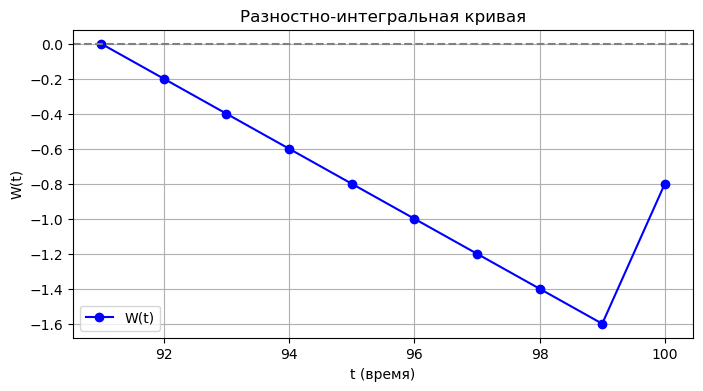

In [51]:
# Шаг 2: вычисляем разностно-интегральную кривую W(t)
W_t = np.cumsum(X - X_mean)  # Накопленная сумма отклонений

# Визуализация
plt.figure(figsize=(8, 4))
plt.plot(W_t, marker='o', linestyle='-', color='b', label="W(t)")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("t (время)")
plt.ylabel("W(t)")
plt.title("Разностно-интегральная кривая")
plt.legend()
plt.grid()
plt.show()

In [52]:
to_plot_hers = []
curr_step = 0
for val in check["untrated"].values:
    curr_step += val
    to_plot_hers.append(curr_step)

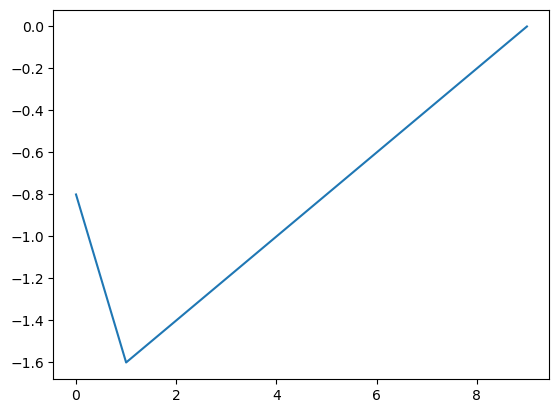

In [53]:
plt.plot(to_plot_hers)

Теперь для всех 75 объектов для Expert RA

Сделаем предобработку по сферам деятельности (соберем мно-во), зная заранее, что нет никаких облигаций 

In [56]:
_ro_type = []
for inn in df_ser[df_ser["Expert RA"] >= 10]["identifier"].values:
    check = df_cur[(df_cur["identifier"] == inn) & (df_cur["agency"] == 'Expert RA')]
    check = check.sort_values(by="_date", ascending=True)
    _ro_type.append(check["_ro_type"].values[0])

In [57]:
sphere = set(_ro_type)

In [58]:
print(sphere)

{'CBNK - кредитная организация', 'FINS - страховая организация', 'FLSG - лизинговая компания (фирма)', 'BNFC - нефинансовая компания', 'FOFO - прочие финансовые организации, в том числе специализированные общества', 'FNPF - негосударственный пенсионный фонд', 'BNFH - холдинговая компания (нефинансовая)'}


In [59]:
check_spehre = ['CBNK - кредитная организация']

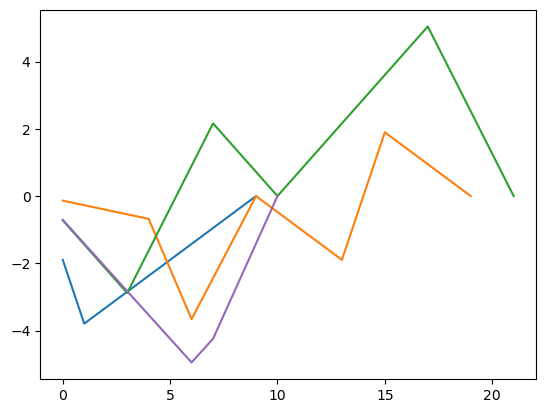

In [60]:
for type_ in sphere:
    full_obj = []
    for inn in df_ser[df_ser["Expert RA"] >= 10]["identifier"].values:
        check = df_cur[(df_cur["identifier"] == inn) & (df_cur["agency"] == 'Expert RA') & (df_cur["_ro_type"] == type_)]
        check = check.sort_values(by="_date", ascending=True)
        check["untrated"] = (check["rating_numeric_cat"] - check["rating_numeric_cat"].mean()) / check["rating_numeric_cat"].std()
        full_obj.append(check["untrated"].values)
    to_plot_hers = []
    curr_step = 0
    for obj in full_obj:
        for step_ in obj:
            curr_step += step_
            to_plot_hers.append(curr_step)

    plt.plot(to_plot_hers)

каждый график отдельно

In [62]:
def hurst_exponent(ts):
    ts = np.array(ts)
    N = len(ts)
    print(ts, N)
    if N < 5:  # Проверка на достаточное количество точек
        return np.nan
    
    # Вычисляем среднее и центрируем ряд
    mean_ts = np.mean(ts)
    dev = ts - mean_ts

    # Кумулятивная сумма
    Z = np.cumsum(dev)
    S = np.std(ts)
    # Размах (R) - разница между max и min кумулятивной суммы
    R = np.max(Z) - np.min(Z)
    if R == 0 or S == 0:
        R = 0.001
        S = 0.0009
        RS_ratio = R / S
        correction_factor = (-0.0011 * np.log(N) + 1.0136)
        return (np.log(RS_ratio) / np.log(np.pi * (N / 2))) * correction_factor

    # Среднеквадратическое отклонение (S)
    
    # Вычисляем R/S
    RS = R / S
    
    # Параметр Херста по логарифмическому масштабу
    H = np.log(RS) / np.log(N)
    
    return H
    

0.42163702135578385
100   -0.8
99    -0.8
98     0.2
97     0.2
96     0.2
95     0.2
94     0.2
93     0.2
92     0.2
91     0.2
Name: untrated, dtype: float64
0.0
114    0.0
113    0.0
112    0.0
111    0.0
110    0.0
109    0.0
108    0.0
107    0.0
106    0.0
105    0.0
Name: untrated, dtype: float64
nan
Series([], Name: untrated, dtype: float64)
nan
Series([], Name: untrated, dtype: float64)
nan
Series([], Name: untrated, dtype: float64)
nan
Series([], Name: untrated, dtype: float64)
nan
Series([], Name: untrated, dtype: float64)
0.0
3002    0.0
3001    0.0
3000    0.0
2988    0.0
2963    0.0
2948    0.0
2935    0.0
2922    0.0
2921    0.0
2919    0.0
Name: untrated, dtype: float64
0.5163977794943223
3362   -0.6
3361   -0.6
3360    0.4
3359    0.4
3351    0.4
3350    0.4
3349    0.4
3348    0.4
3347   -0.6
3346   -0.6
Name: untrated, dtype: float64
0.5163977794943223
3394    0.6
3393    0.6
3392    0.6
3391    0.6
3389   -0.4
3388   -0.4
3387   -0.4
3386   -0.4
3384   -0.4
3382   

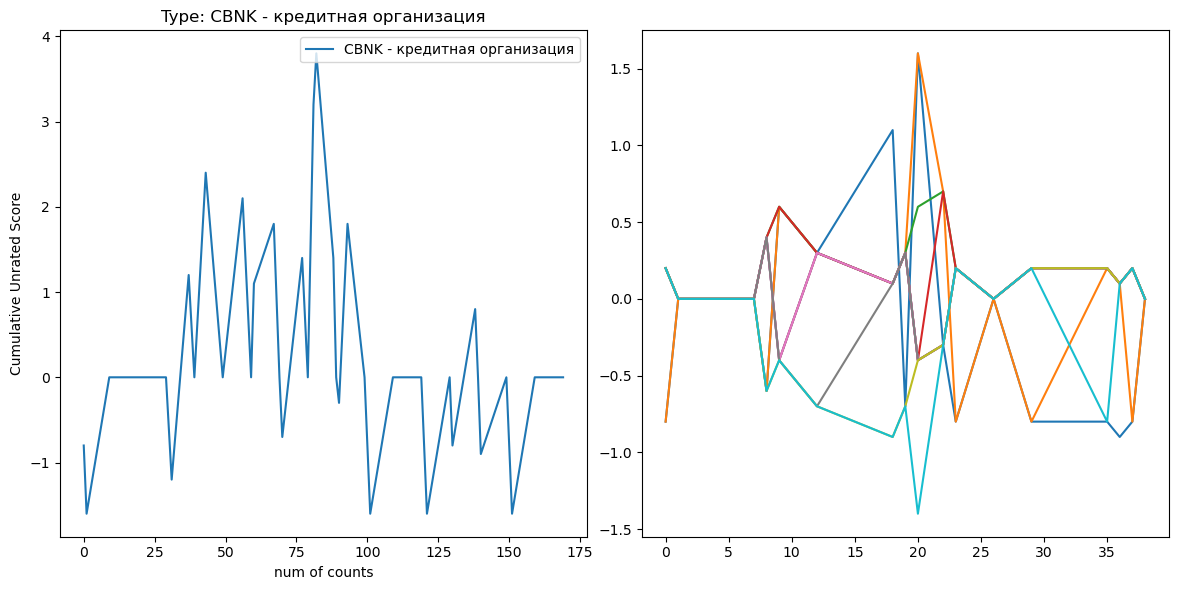

In [151]:
import math
check_sphere = ['CBNK - кредитная организация']
num_plots = 2
cols = 2  # Количество столбцов в сетке субплотов
rows = math.ceil(num_plots / cols)  # Количество строк

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
axes = axes.flatten() if num_plots > 1 else [axes]
hurst_ = []
for idx, type_ in enumerate(check_sphere):
    to_plot_hers = []
    curr_step = 0
    
    for inn in df_ser[df_ser["Expert RA"] == 10]["identifier"].values:
        # print(inn)
        check = df_cur[(df_cur["identifier"] == inn) & 
                       (df_cur["agency"] == 'Expert RA') & 
                       (df_cur["_ro_type"] == type_)]
        check = check.sort_values(by="_date", ascending=True)
        
        # check["untrated"] = (check["rating_numeric_cat"] - check["rating_numeric_cat"].mean()) / check["rating_numeric_cat"]
        check["untrated"] = check["rating_numeric_cat"]- check["rating_numeric_cat"].mean()
        print(check["rating_numeric_cat"].std())
        print(check["untrated"])
        for step_ in check["untrated"].values:
            curr_step += step_
            to_plot_hers.append(curr_step)
        # hurst_.append(hurst_exponent(check["untrated"].values))

        hurst_.append(check["untrated"].values)
        
    axes[idx].plot(to_plot_hers, label=type_)
    axes[idx].set_title(f"Type: {type_}")
    axes[idx].set_xlabel("num of counts")
    axes[idx].set_ylabel("Cumulative Unrated Score")
    axes[idx].legend()

plt.tight_layout()
print(hurst_)
plt.plot(pd.DataFrame(hurst_).dropna())
plt.show()


In [153]:
len(hurst_)

40

In [155]:
total_ = []
for i in hurst_:
    if len(i) > 0:
        for j in i:
            total_.append(j)

In [157]:
Z = np.cumsum(total_)

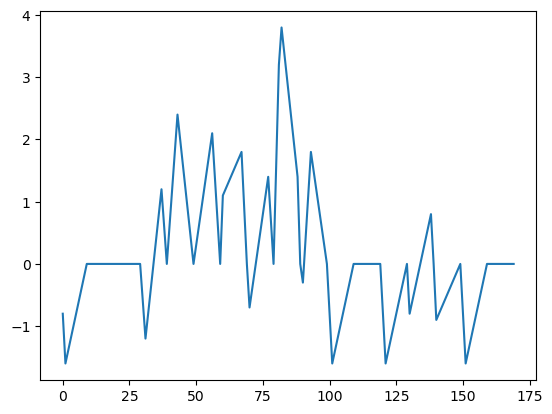

In [159]:
plt.plot(Z)

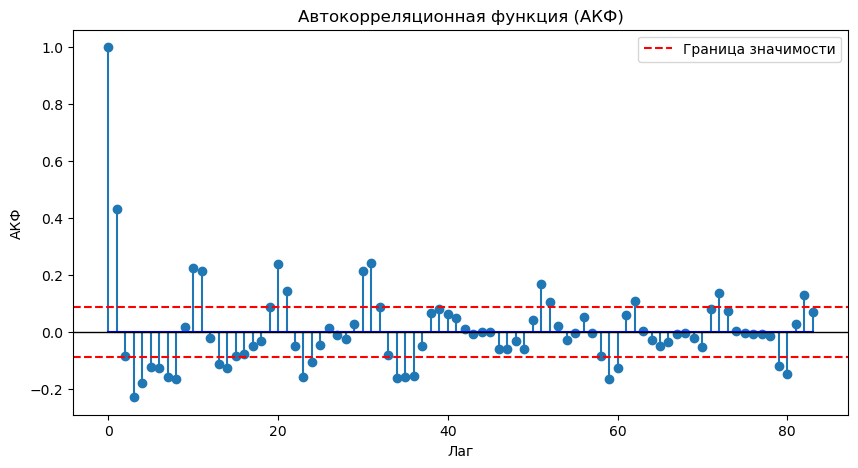

In [161]:
lags = 83
acf_values = acf(total_, nlags=lags, fft=True)
# N = len(acf_values)
# Визуализация
plt.figure(figsize=(10, 5))
plt.stem(range(lags + 1), acf_values, basefmt="b")  # basefmt="b" = синий маркер на оси
plt.axhline(y=0, color='black', linewidth=1)
plt.axhline(y=1.96/np.sqrt(N), linestyle='--', color='red', label="Граница значимости")
plt.axhline(y=-1.96/np.sqrt(N), linestyle='--', color='red')
plt.xlabel('Лаг')
plt.ylabel('АКФ')
plt.title('Автокорреляционная функция (АКФ)')
plt.legend()
plt.show()

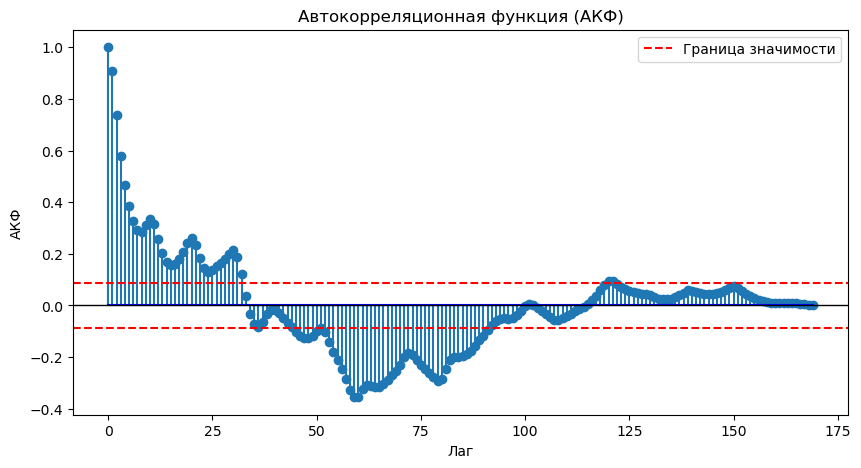

In [163]:
Z = np.cumsum(total_)
lags = len(Z) - 1
acf_values = acf(Z, nlags=lags, fft=True)
# N = len(acf_values)
# Визуализация
plt.figure(figsize=(10, 5))
plt.stem(range(lags + 1), acf_values, basefmt="b")  # basefmt="b" = синий маркер на оси
plt.axhline(y=0, color='black', linewidth=1)
plt.axhline(y=1.96/np.sqrt(N), linestyle='--', color='red', label="Граница значимости")
plt.axhline(y=-1.96/np.sqrt(N), linestyle='--', color='red')
plt.xlabel('Лаг')
plt.ylabel('АКФ')
plt.title('Автокорреляционная функция (АКФ)')
plt.legend()
plt.show()

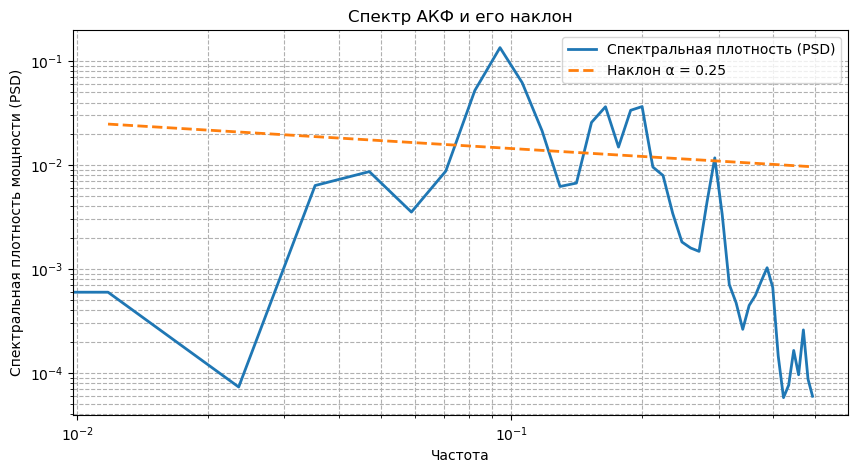

Найденный наклон спектра α ≈ 0.25


In [165]:
from scipy.signal import welch
from scipy.optimize import curve_fit
# Данные АКФ
lags = len(total_)
acf_values = acf(total_, nlags=lags, fft=True)

# 1. Вычисляем спектральную плотность мощности (PSD)
frequencies, psd = welch(acf_values, fs=1.0, nperseg=len(acf_values)//2)

# 2. Функция для степенного закона: S(f) ~ f^(-alpha)
def power_law(f, a, alpha):
    return a * f ** (-alpha)

# 3. Фитируем наклон спектра в логарифмическом масштабе
valid = (frequencies > 0.01) & (frequencies < 0.5)  # Ограничим диапазон частот
popt, _ = curve_fit(power_law, frequencies[valid], psd[valid])

# 4. Визуализация спектра и аппроксимации
plt.figure(figsize=(10, 5))
plt.loglog(frequencies, psd, label="Спектральная плотность (PSD)", linewidth=2)
plt.loglog(frequencies[valid], power_law(frequencies[valid], *popt), '--', 
           label=f"Наклон α = {popt[1]:.2f}", linewidth=2)

plt.xlabel("Частота")
plt.ylabel("Спектральная плотность мощности (PSD)")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.title("Спектр АКФ и его наклон")
plt.show()

print(f"Найденный наклон спектра α ≈ {popt[1]:.2f}")

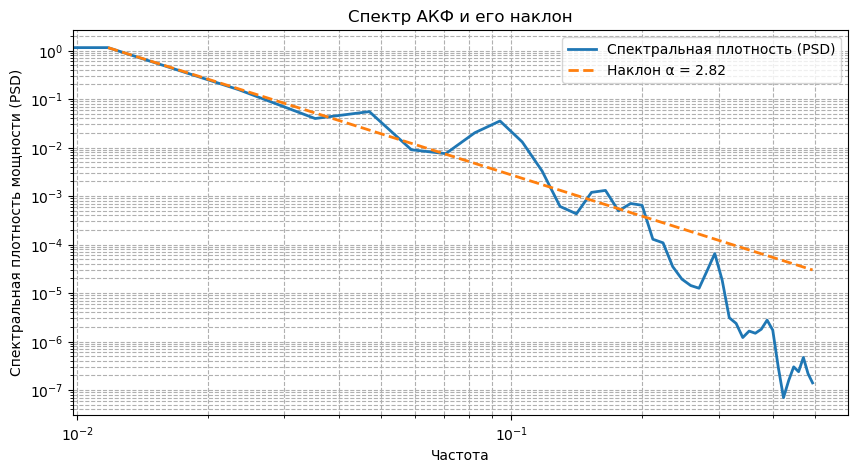

Найденный наклон спектра α ≈ 2.82


In [167]:
from scipy.signal import welch
from scipy.optimize import curve_fit
# Данные АКФ
lags = len(np.cumsum(total_))
acf_values = acf(np.cumsum(total_), nlags=lags, fft=True)

# 1. Вычисляем спектральную плотность мощности (PSD)
frequencies, psd = welch(acf_values, fs=1.0, nperseg=len(acf_values)//2)

# 2. Функция для степенного закона: S(f) ~ f^(-alpha)
def power_law(f, a, alpha):
    return a * f ** (-alpha)

# 3. Фитируем наклон спектра в логарифмическом масштабе
valid = (frequencies > 0.01) & (frequencies < 0.5)  # Ограничим диапазон частот
popt, _ = curve_fit(power_law, frequencies[valid], psd[valid])

# 4. Визуализация спектра и аппроксимации
plt.figure(figsize=(10, 5))
plt.loglog(frequencies, psd, label="Спектральная плотность (PSD)", linewidth=2)
plt.loglog(frequencies[valid], power_law(frequencies[valid], *popt), '--', 
           label=f"Наклон α = {popt[1]:.2f}", linewidth=2)

plt.xlabel("Частота")
plt.ylabel("Спектральная плотность мощности (PSD)")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.title("Спектр АКФ и его наклон")
plt.show()

print(f"Найденный наклон спектра α ≈ {popt[1]:.2f}")

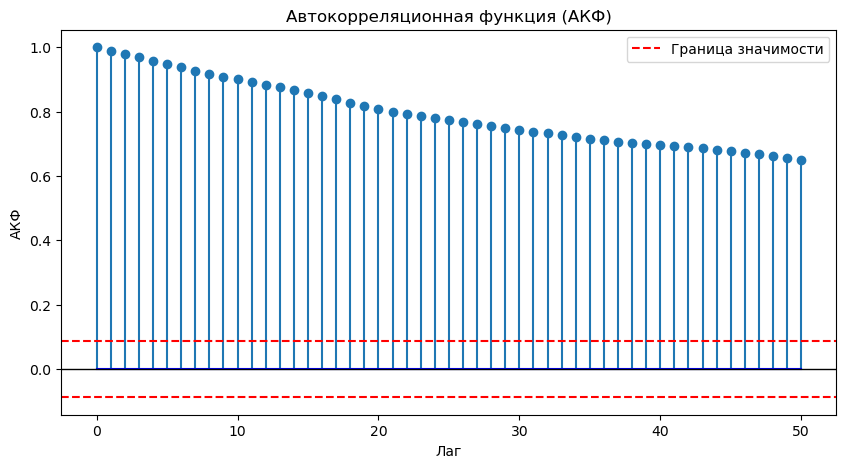

In [96]:
# Генерируем случайный временной ряд (если у тебя есть данные, подставь их)
np.random.seed(42)
N = 500
hurst_ = np.cumsum(np.random.randn(N))  # Пример временного ряда

# Проверка, что hurst_ — это одномерный массив
hurst_ = np.asarray(hurst_, dtype=np.float64)
hurst_ = hurst_[~np.isnan(hurst_)]  # Удаляем NaN, если есть

# Вычисляем автокорреляцию
lags = 50  # Количество лагов
acf_values = acf(hurst_, nlags=lags, fft=True)

# Визуализация
plt.figure(figsize=(10, 5))
plt.stem(range(lags + 1), acf_values, basefmt="b")  # basefmt="b" = синий маркер на оси
plt.axhline(y=0, color='black', linewidth=1)
plt.axhline(y=1.96/np.sqrt(N), linestyle='--', color='red', label="Граница значимости")
plt.axhline(y=-1.96/np.sqrt(N), linestyle='--', color='red')
plt.xlabel('Лаг')
plt.ylabel('АКФ')
plt.title('Автокорреляционная функция (АКФ)')
plt.legend()
plt.show()

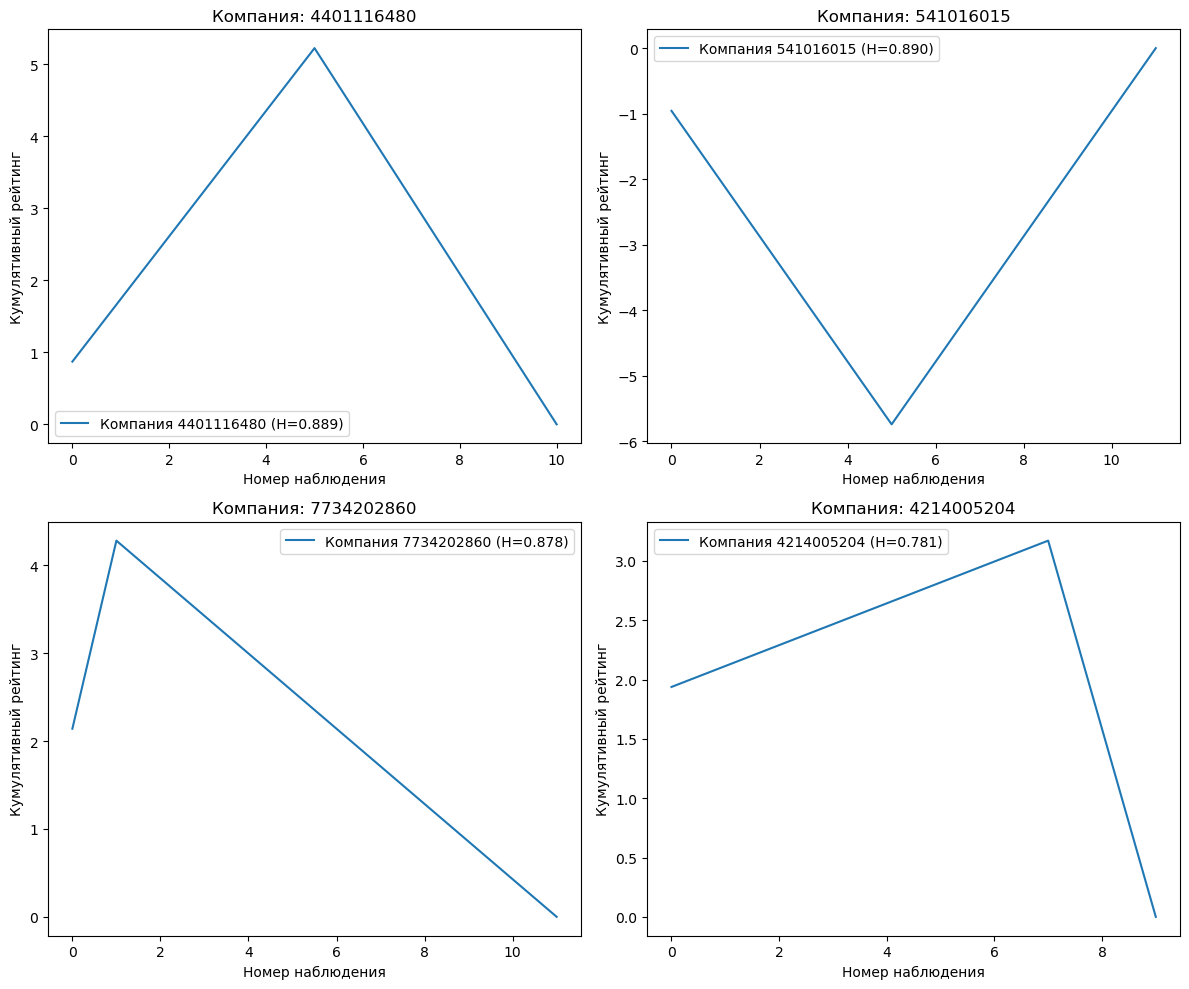

      Компания  Параметр Херста
7   3906098008         0.959784
15  7702045051         0.927811
1   1435138944         0.905897
19  7727065444         0.894939
25  7744000912         0.891528
6   3803202031         0.891370
29  7831000034         0.890767
0    541016015         0.889918
9   4401116480         0.888949
26  7750004305         0.888949
11  5404154492         0.888260
18  7710140679         0.888260
23  7736046991         0.888260
2   1835047032         0.878284
21  7734202860         0.878284
4   3327100351         0.862468
5   3525023780         0.862468
16  7706196340         0.862468
28  7831000027         0.850614
13  5617000264         0.850614
12  5405114781         0.850614
10  5200000222         0.850614
30  7831000080         0.850614
22  7735057951         0.788250
8   4214005204         0.781170
3   2634028786              NaN
14  5902300072              NaN
17  7708022300              NaN
20  7730060164              NaN
24  7744000302              NaN
27  7750

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

def compute_hurst(ts):
    """
    Вычисляет показатель Херста с использованием метода R/S-анализа.
    """
    N = len(ts)
    if N < 10:  # Если данных меньше 10, не считаем
        return np.nan
    
    mean_ts = np.mean(ts)
    devs = ts - mean_ts
    cum_dev = np.cumsum(devs)
    
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts, ddof=1)
    
    if S == 0:
        return np.nan
    
    H = math.log10(R / S) / math.log10(N / 2)
    
    # Поправка Наймана для малых выборок
    if N < 100:
        H *= (-0.0011 * np.log(N) + 1.0136)
    
    return H

# Группировка по компаниям
check_sphere = ['CBNK - кредитная организация']
df_filtered = df_cur[
    (df_cur["agency"] == 'Expert RA') & 
    (df_cur["_ro_type"].isin(check_sphere))
]

hurst_results = {}
company_series = {}

for inn, group in df_filtered.groupby("identifier"):
    if len(group) < 10:
        continue  # Пропускаем компании с малым числом наблюдений
    
    group = group.sort_values(by="_date", ascending=True)

    # Нормализация рейтингов
    group["untrated"] = group["rating_numeric_cat"].apply(
        lambda x: (x - group["rating_numeric_cat"].mean()) / 
                  (group["rating_numeric_cat"].std() if group["rating_numeric_cat"].std() != 0 else 0.001)
    )
    
    # Кумулятивная сумма отклонений
    cumulative_series = np.cumsum(group["untrated"].values)
    
    # Сохранение для графиков
    company_series[inn] = cumulative_series
    
    # Вычисление параметра Херста
    hurst_value = compute_hurst(cumulative_series)
    hurst_results[inn] = hurst_value

# Выбор 4 случайных компаний для графика
plot_count = min(4, len(company_series))
selected_companies = random.sample(list(company_series.keys()), plot_count)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, inn in enumerate(selected_companies):
    axes[idx].plot(company_series[inn], label=f"Компания {inn} (H={hurst_results[inn]:.3f})")
    axes[idx].set_title(f"Компания: {inn}")
    axes[idx].set_xlabel("Номер наблюдения")
    axes[idx].set_ylabel("Кумулятивный рейтинг")
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Вывод показателей Херста
hurst_df = pd.DataFrame(hurst_results.items(), columns=["Компания", "Параметр Херста"])
print(hurst_df.sort_values(by="Параметр Херста", ascending=False))


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def compute_hurst(ts):
    """
    Вычисляет показатель Херста с использованием метода R/S-анализа.
    """
    N = len(ts)
    if N < 5:
        return np.nan
    
    mean_ts = np.mean(ts)
    devs = ts - mean_ts
    cum_dev = np.cumsum(devs)
    
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(ts, ddof=1)
    
    if S == 0:
        return np.nan
    
    H = math.log10(R / S) / math.log10(N / 2)
    
    # Поправка Наймана для малых выборок
    if N < 10:
        H *= (-0.0011 * np.log(N) + 1.0136)
    
    return H

# Фильтрация данных по сектору CBNK
check_sphere = ['CBNK - кредитная организация']
df_filtered = df_cur[
    (df_cur["agency"] == 'Expert RA') & 
    (df_cur["_ro_type"].isin(check_sphere))
].copy()  # Делаем копию, чтобы избежать предупреждения

# Добавляем столбец "год"
df_filtered["_year"] = df_filtered["_date"].dt.year

# Получаем список лет
years = sorted(df_filtered["_year"].unique())

hurst_by_year = {}

for year in years:
    df_year = df_filtered[df_filtered["_r"] == year].copy()  # Делаем копию, чтобы избежать предупреждения
    
    if len(df_year) < 6:
        continue  # Пропускаем годы с малым числом данных
    
    # Нормализация рейтингов
    df_year.loc[:, "untrated"] = df_year.groupby("identifier")["rating_numeric_cat"].transform(
        lambda x: (x - x.mean()) / (x.std() if x.std() != 0 else 0.001)
    )
    
    # Суммарный кумулятивный ряд по всем компаниям
    cumulative_series = np.cumsum(df_year["untrated"].values)
    print(cumulative_series)
    # Вычисление параметра Херста
    hurst_value = compute_hurst(cumulative_series)
    hurst_by_year[year] = hurst_value

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(hurst_by_year.keys(), hurst_by_year.values(), marker='o', linestyle='-')
plt.xlabel("Год")
plt.ylabel("Параметр Херста")
plt.title("Изменение параметра Херста по годам (CBNK - кредитная организация)")
plt.grid()
plt.show()

# Вывод значений
hurst_df = pd.DataFrame(hurst_by_year.items(), columns=["Год", "Параметр Херста"])
print(hurst_df.sort_values(by="Год"))


KeyError: '_r'

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

check_sphere = ['CBNK - кредитная организация']
num_plots = 2
cols = 2  # Количество столбцов в сетке субплотов
rows = math.ceil(num_plots / cols)  # Количество строк

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
axes = axes.flatten() if num_plots > 1 else [axes]

def compute_hurst(ts):
    """Функция для вычисления параметра Херста."""
    from math import sqrt
    n = len(ts)
    if n < 20:
        return np.nan  # Слишком короткий ряд
    
    means = np.mean(ts)
    ts_cumsum = np.cumsum(ts - means)  # Центрированное накопленное отклонение
    R = np.max(ts_cumsum) - np.min(ts_cumsum)  # Размах
    S = np.std(ts) + 1e-3  # Стандартное отклонение с добавлением eps
    # return np.log(R / S) / np.log(n)
    # return R / sqrt(n)
    return pow(n, 0.73)

hurst_values = []

for idx, type_ in enumerate(check_sphere):
    to_plot_hers = []
    curr_step = 0
    
    for inn in df_ser[df_ser["Expert RA"] >= 10]["identifier"].values:
        check = df_cur[
            (df_cur["identifier"] == inn) & 
            (df_cur["agency"] == 'Expert RA') & 
            (df_cur["_ro_type"] == type_)
        ].sort_values(by="_date", ascending=True)

        # Нормализация с учетом нулевого стандартного отклонения
        check["untrated"] = check["rating_numeric_cat"].apply(
            lambda x: (x - check["rating_numeric_cat"].mean()) / (check["rating_numeric_cat"].std() if check["rating_numeric_cat"].std() != 0 else 0.001)
        )
        # check["untrated"] = (check["rating_numeric_cat"] - check["rating_numeric_cat"].mean())
        print(f"STD: {check['rating_numeric_cat'].std()}")
        print(check["untrated"])

        for step_ in check["untrated"].values:
            curr_step += step_
            to_plot_hers.append(curr_step)
    
    # Вычисление параметра Херста
    hurst = compute_hurst(to_plot_hers)
    hurst_values.append((type_, hurst))
    
    # Визуализация
    axes[idx].plot(to_plot_hers, label=f"{type_} (H={hurst:.2f})")
    axes[idx].set_title(f"Type: {type_}")
    axes[idx].set_xlabel("Num of counts")
    axes[idx].set_ylabel("Cumulative Unrated Score")
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Вывод параметров Херста
print(hurst_values)
for t, h in hurst_values:
    print(f"Type: {t}, Hurst exponent: {h:.2f}")


In [ ]:
# Округляем дату до года
df_cur["_year"] = df_cur["_date"].dt.year

# Группируем по году и идентификатору, усредняем и округляем вверх
df_grouped = (
    df_cur.groupby(["_year", "identifier", "agency", "_ro_type"], as_index=False)
    .agg({"rating_numeric_cat": lambda x: np.ceil(x.mean())})
)
print(df_grouped)

In [ ]:
inn = 7831000080    
df_grouped[(df_grouped["identifier"] == inn)]

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

check_sphere = ['CBNK - кредитная организация']
num_plots = len(check_sphere)
cols = 2  # Количество столбцов в сетке субплотов
rows = math.ceil(num_plots / cols)  # Количество строк

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))

# Приводим axes к одномерному списку осей
if num_plots == 1:
    axes = [axes]
else:
    axes = axes.flatten()

def compute_hurst(ts):
    """Функция для вычисления параметра Херста."""
    n = len(ts)
    if n < 3:
        return np.nan  # Слишком короткий ряд
        
    means = np.mean(ts)
    ts_cumsum = np.cumsum(ts - means)  # Центрированное накопленное отклонение
    R = np.max(ts_cumsum) - np.min(ts_cumsum)  # Размах
    S = np.std(ts) + 1e-3  # Стандартное отклонение с добавлением eps
    print(R, S)
    return np.log(R / S) / np.log(n)  # Классическая формула Херста

hurst_values = []
current_graph = [] 
years = sorted(df_cur["_date"].dt.year.unique())  # Упорядоченные годы
print(df_grouped[(df_grouped["_year"] == 2017) & (df_grouped["identifier"] == 8602190258)])
print(df_ser[df_ser["Expert RA"] >= 10])
print(years)
for idx, type_ in enumerate(check_sphere):
    curr_step = 0
    
    for year in years:  # Внешний цикл по годам
        yearly_values = []
        to_plot_hers = []
        current_data = []
        print(year)
        for inn in df_ser[df_ser["Expert RA"] >= 10]["identifier"].values:  # Внутренний цикл по компаниям
            check = df_grouped[
                (df_grouped["identifier"] == inn) & 
                (df_grouped["agency"] == 'Expert RA') & 
                (df_grouped["_ro_type"] == type_) & (df_grouped["_year"] == year)].sort_values(by="_year", ascending=True)
            
            if check.empty:
                continue
            
            mean_ = check["rating_numeric_cat"].mean()
            std_ = check["rating_numeric_cat"].std() if check["rating_numeric_cat"].std() != 0 else 0.001
            # print(mean_, std_)
            current_data.append(check["rating_numeric_cat"].mean())
            # yearly_values.append((check["rating_numeric_cat"].iloc[-1] - mean_) / std_)
            # # print((check["rating_numeric_cat"].iloc[-1] - mean_) / std_)
            # current_graph.append(((check["rating_numeric_cat"].iloc[-1] - mean_) / std_))
    
        # if yearly_values:
        #     avg_yearly_score = np.mean(yearly_values)  # Среднее по всем компаниям в году
        #     curr_step += avg_yearly_score
        #     to_plot_hers.append(curr_step)
            
        print(current_data)
        # Вычисление параметра Херста
        hurst = compute_hurst(current_data)
        hurst_values.append((type_, hurst))
    
    # Визуализация
    # print(f"Type: {type_}, idx: {idx}, axes shape: {np.shape(axes)}")
    # print(f"Years: {years[:len(to_plot_hers)]}, to_plot_hers: {to_plot_hers}")

    # axes.plot(years[:len(to_plot_hers)], to_plot_hers, label=f"{type_} (H={hurst:.2f})", marker="o")
    # # axes.flatten()[idx].plot(years[:len(to_plot_hers)], to_plot_hers, label=f"{type_} (H={hurst:.2f})", marker="o")
    # axes.set_title(f"Type: {type_}")
    # axes.set_xlabel("Year")
    # axes.set_ylabel("Cumulative Unrated Score")

print(hurst_values)
    # axes[idx].legend()
# Вывод параметров Херста
to_plot = []
print("Рассчитанные параметры Херста:")
for t, h in hurst_values:
    print(f"Type: {t}, Hurst exponent: {h:.2f}")
    to_plot.append(h)
# print(current_graph) 
plt.plot(pd.DataFrame(to_plot).dropna())
plt.title(f"avarage is {pd.DataFrame(to_plot).dropna().sum()/ len(pd.DataFrame(to_plot).dropna())}")
plt.tight_layout()
plt.show()



In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

check_sphere = ['CBNK - кредитная организация']
num_plots = 2
cols = 2  # Количество столбцов в сетке субплотов
rows = math.ceil(num_plots / cols)  # Количество строк

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
axes = axes.flatten() if num_plots > 1 else [axes]

def compute_hurst(ts):
    """Функция для вычисления параметра Херста."""
    from math import sqrt
    n = len(ts)
    if n < 20:
        return np.nan  # Слишком короткий ряд
    
    means = np.mean(ts)
    ts_cumsum = np.cumsum(ts - means)  # Центрированное накопленное отклонение
    R = np.max(ts_cumsum) - np.min(ts_cumsum)  # Размах
    S = np.std(ts) + 1e-3  # Стандартное отклонение с добавлением eps
    return np.log(R / S) / np.log(n)
    # return R / sqrt(n)
    # return pow(n, 0.73)

hurst_values = []

for idx, type_ in enumerate(check_sphere):
    to_plot_hers = []
    curr_step = 0
    
    for inn in df_ser[df_ser["Expert RA"] == 10]["identifier"].values:
        check = df_grouped[
            (df_grouped["identifier"] == inn) & 
            (df_grouped["agency"] == 'Expert RA') & 
            (df_grouped["_ro_type"] == type_)
        ].sort_values(by="_year", ascending=True)

        # Нормализация с учетом нулевого стандартного отклонения
        # check["untrated"] = check["rating_numeric_cat"].apply(
        #     lambda x: (x - check["rating_numeric_cat"].mean()) / (check["rating_numeric_cat"].std() if check["rating_numeric_cat"].std() != 0 else 0.001)
        # )
        check["untrated"] = (check["rating_numeric_cat"] - check["rating_numeric_cat"].mean())
        print(f"STD: {check['rating_numeric_cat'].std()}")
        print(check["untrated"])

        for step_ in check["untrated"].values:
            curr_step += step_
            to_plot_hers.append(curr_step)
    
    # Вычисление параметра Херста
    hurst = compute_hurst(to_plot_hers)
    hurst_values.append((type_, hurst))
    
    # Визуализация
    axes[idx].plot(to_plot_hers, label=f"{type_} (H={hurst:.2f})")
    axes[idx].set_title(f"Type: {type_}")
    axes[idx].set_xlabel("Num of counts")
    axes[idx].set_ylabel("Cumulative Unrated Score")
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Вывод параметров Херста
print(hurst_values)
for t, h in hurst_values:
    print(f"Type: {t}, Hurst exponent: {h:.2f}")


In [ ]:
# ==== 2. Вычисление отклонения от среднего по сектору ====
df = df_grouped

df = df[df["_ro_type"] == "CBNK - кредитная организация"]

# ==== 2. Оставляем компании, у которых есть 10+ наблюдений ====
valid_companies = df["identifier"].value_counts()
valid_companies = valid_companies[valid_companies >= 8].index
df = df[df["identifier"].isin(valid_companies)]

# ==== 3. Вычисляем отклонения рейтинга от среднего за каждый год ====
df["year_avg"] = df.groupby("_year")["rating_numeric_cat"].transform("mean")
df["deviation"] = df["rating_numeric_cat"] - df["year_avg"]

# ==== 4. Усредняем отклонения по всем компаниям в каждый год ====
df_avg_dev = df.groupby("_year")["deviation"].mean().reset_index()

# ==== 5. Применяем сглаживание (5-летнее окно) ====
df_avg_dev["smoothed_dev"] = df_avg_dev["deviation"].rolling(window=1, min_periods=1).mean()

# ==== 6. Функция вычисления параметра Херста ====
def compute_hurst(ts):
    """Вычисление параметра Херста."""
    n = len(ts)
    if n < 5:
        return np.nan  # Недостаточно данных
    means = np.mean(ts)
    ts_cumsum = np.cumsum(ts - means)  # Центрированное накопленное отклонение
    R = np.max(ts_cumsum) - np.min(ts_cumsum)  # Размах
    S = np.std(ts) + 1e-3  # Стандартное отклонение с eps
    return np.log(R / S) / np.log(n)  # Формула Херста

hurst_value = compute_hurst(df_avg_dev["smoothed_dev"].dropna().values)

# ==== 7. Построение графика ====
plt.figure(figsize=(12, 6))
plt.plot(df_avg_dev["_year"], df_avg_dev["smoothed_dev"], label="Среднее отклонение", color="b")

plt.xlabel("Год")
plt.ylabel("Сглаженное отклонение рейтинга")
plt.title(f"Отклонения рейтингов для CBNK (H = {hurst_value:.3f})")
plt.legend()
plt.grid()
plt.show()

# ==== 8. Вывод значения Херста ====
print(f"Параметр Херста для CBNK: {hurst_value:.3f}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def calculate_herst_exponent(series):
    """Вычисление показателя Херста через DFA-анализ."""
    n = len(series)
    if n < 10:
        # Если данных мало, используем формулу Наймана
        R_S = (series.max() - series.min()) / series.std()
        H = np.log10(R_S) / np.log10(np.pi * (n / 2)) * (-0.0011 * np.log(n) + 1.0136)
        return H
    else:
        # Обычный DFA-анализ
        scales = np.logspace(0.5, np.log10(n//2), num=20, dtype=int)
        F = []
        for scale in scales:
            segments = n // scale
            reshaped_series = series[:segments * scale].values.reshape(segments, scale)
            local_trend = np.polyfit(range(scale), reshaped_series.T, 1)[0]
            detrended_series = reshaped_series - (local_trend * np.arange(scale))
            F.append(np.sqrt(np.mean(detrended_series ** 2)))
        slope, _, _, _, _ = linregress(np.log10(scales), np.log10(F))
        return slope

def analyze_sector(data, sector):
    """Анализ сектора CBNK и построение графика отклонений."""
    df_sector = data[data['_ro_type'] == sector]
    df_filtered = df_sector.groupby('identifier').filter(lambda x: len(x) >= 10)
    df_mean = df_filtered.groupby('_year')['rating_numeric_cat'].mean()
    deviations = df_filtered.groupby(['identifier', '_year'])['rating_numeric_cat'].mean() - df_mean
    deviations = deviations.reset_index().pivot(index='_year', columns='identifier', values='rating_numeric_cat')
    deviations = deviations.mean(axis=1)
    herst_value = calculate_herst_exponent(deviations.dropna())
    
    plt.figure(figsize=(10, 5))
    plt.plot(deviations.index, deviations.values, label='Отклонение от среднего')
    plt.xlabel('Год')
    plt.ylabel('Отклонение')
    plt.title(f'Отклонения рейтингов от средних ({sector}), H={herst_value:.3f}')
    plt.legend()
    plt.show()
    
    return herst_value

# Чтение данных и вызов анализа
data = df_grouped
herst_cbnk = analyze_sector(data, 'CBNK')
print(f'Показатель Херста для сектора CBNK: {herst_cbnk:.3f}')


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

check_sphere = ['CBNK - кредитная организация']
num_plots = len(check_sphere)
cols = 2  # Количество столбцов в сетке субплотов
rows = math.ceil(num_plots / cols)  # Количество строк

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))

# Приводим axes к одномерному списку осей
if num_plots == 1:
    axes = [axes]
else:
    axes = axes.flatten()

def compute_hurst(ts):
    """Функция для вычисления параметра Херста."""
    n = len(ts)
    if n < 20:
        return np.nan  # Слишком короткий ряд
    means = np.mean(ts)
    ts_cumsum = np.cumsum(ts - means)  # Центрированное накопленное отклонение
    R = np.max(ts_cumsum) - np.min(ts_cumsum)  # Размах
    S = np.std(ts) + 1e-3  # Стандартное отклонение с добавлением eps
    return np.log(R / S) / np.log(n)  # Классическая формула Херста

hurst_values = []

years = sorted(df_cur["_date"].dt.year.unique())  # Упорядоченные годы

for idx, type_ in enumerate(check_sphere):
    to_plot_hers = []
    curr_step = 0
    point_counts = []  # Количество точек на каждом шаге
    
    for year in years:  # Внешний цикл по годам
        yearly_values = []
        
        for inn in df_ser[df_ser["Expert RA"] >= 10]["identifier"].values:  # Внутренний цикл по компаниям
            check = df_grouped[
                (df_grouped["identifier"] == inn) & 
                (df_grouped["agency"] == 'Expert RA') & 
                (df_grouped["_ro_type"] == type_) &
                (df_grouped["_year"] == year)
            ]
            
            if check.empty:
                continue
            
            mean_ = check["rating_numeric_cat"].mean()
            std_ = check["rating_numeric_cat"].std() if check["rating_numeric_cat"].std() != 0 else 0.001
            yearly_values.append((check["rating_numeric_cat"] - mean_) / std_)

        if yearly_values:
            avg_yearly_score = np.mean(yearly_values)  # Среднее по всем компаниям в году
            curr_step += avg_yearly_score
            to_plot_hers.append(curr_step)
            point_counts.append(len(yearly_values))  # Запоминаем количество точек за этот год

    print(f"Type: {type_}, idx: {idx}, axes shape: {np.shape(axes)}")
    print(f"Years: {years[:len(to_plot_hers)]}, to_plot_hers: {to_plot_hers}")

    # Вычисление параметра Херста
    hurst = compute_hurst(to_plot_hers)
    hurst_values.append((type_, hurst))
    
    # Визуализация
    ax = axes[idx]
    ax.plot(years[:len(to_plot_hers)], to_plot_hers, label=f"{type_} (H={hurst:.2f})", marker="o")
    
    # Добавляем вторую ось для отображения количества точек в каждый год
    ax2 = ax.twinx()
    ax2.bar(years[:len(to_plot_hers)], point_counts, alpha=0.3, color="gray", label="Num of Points")

    ax.set_title(f"Type: {type_}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Cumulative Unrated Score")
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

# Вывод параметров Херста
print("Рассчитанные параметры Херста:")
for t, h in hurst_values:
    print(f"Type: {t}, Hurst exponent: {h:.2f}")


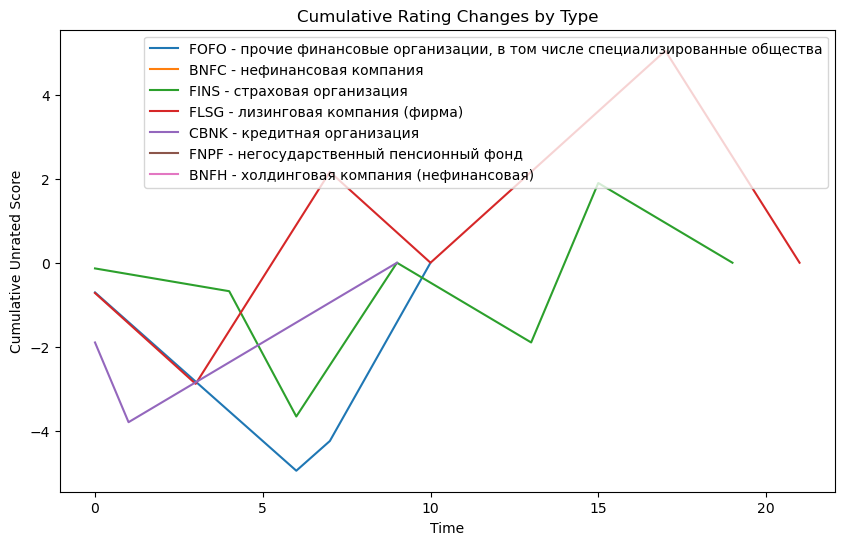

In [197]:
plt.figure(figsize=(10, 6))

for type_ in sphere:
    to_plot_hers = []
    curr_step = 0
    
    for inn in df_ser[df_ser["Expert RA"] >= 10]["identifier"].values:
        check = df_cur[(df_cur["identifier"] == inn) & 
                       (df_cur["agency"] == 'Expert RA') & 
                       (df_cur["_ro_type"] == type_)]
        check = check.sort_values(by="_date", ascending=True)
        check["untrated"] = (check["rating_numeric_cat"] - check["rating_numeric_cat"].mean()) / check["rating_numeric_cat"].std(skipna=True)
        
        for step_ in check["untrated"].values:
            curr_step += step_
            to_plot_hers.append(curr_step)
    
    plt.plot(to_plot_hers, label=type_)

plt.legend()
plt.xlabel("Time")
plt.ylabel("Cumulative Unrated Score")
plt.title("Cumulative Rating Changes by Type")
plt.show()

In [138]:
full_obj

[array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([nan, nan, nan, nan, 

Относительно всех типов

In [140]:
to_plot_hers = []
curr_step = 0
for obj in full_obj:
    for step_ in obj:
        curr_step += step_
        to_plot_hers.append(curr_step)

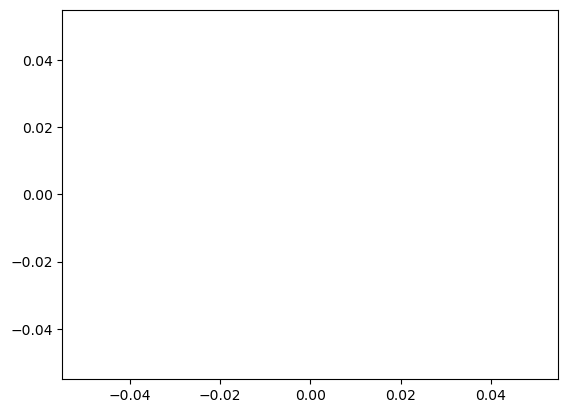

In [141]:
plt.plot(to_plot_hers)

Аналогично можно сделать и для других компанимй (из другой книжки)

In [30]:
set(_ro_type)

{'BNFC - нефинансовая компания',
 'BNFH - холдинговая компания (нефинансовая)',
 'CBNK - кредитная организация',
 'FINS - страховая организация',
 'FLSG - лизинговая компания (фирма)',
 'FNPF - негосударственный пенсионный фонд',
 'FOFO - прочие финансовые организации, в том числе специализированные общества'}

Доработаем параметр Херста для равношаговых данных:

In [ ]:
import pandas as pd

# Загружаем данные
df = pd.read_csv("your_data.csv", parse_dates=["_date"])

# Убедимся, что сортировка по времени
df = df.sort_values(by=["ideintifer", "_date"])

# Определяем шаг (например, 1 месяц)
df = df.set_index("_date")
df = df.groupby("ideintifer").resample("M").asfreq()

# Интерполируем пропущенные значения
df["rating"] = df["rating"].interpolate()

# Сбрасываем индекс для удобства
df = df.reset_index()

print(df.head())
